In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('TCS.NS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-22,725.000,732.025024,721.150024,727.549988,589.708862,1310694.0
1,2013-02-25,726.500,737.500000,725.750000,736.849976,597.246765,1730030.0
2,2013-02-26,733.500,749.974976,733.000000,748.200012,606.446533,2853670.0
3,2013-02-27,747.625,751.525024,738.650024,741.599976,601.096863,2556682.0
4,2013-02-28,743.125,762.500000,742.625000,758.500000,614.794861,4599424.0


In [4]:
df1=df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
df1

,Date,Close
0,2013-02-22,727.549988
1,2013-02-25,736.849976
2,2013-02-26,748.200012
3,2013-02-27,741.599976
4,2013-02-28,758.500000
...,...,...
2464,2023-02-16,3558.050049
2465,2023-02-17,3501.149902
2466,2023-02-20,3487.300049
2467,2023-02-21,3451.000000


In [6]:
df1.columns=["Date","Close"]
df1.head()

,Date,Close
0,2013-02-22,727.549988
1,2013-02-25,736.849976
2,2013-02-26,748.200012
3,2013-02-27,741.599976
4,2013-02-28,758.500000


In [7]:
# Convert Date into Datetime

In [8]:
df1['Date']=pd.to_datetime(df1['Date'])

In [9]:
df1=df1.dropna()

In [10]:
df1

,Date,Close
0,2013-02-22,727.549988
1,2013-02-25,736.849976
2,2013-02-26,748.200012
3,2013-02-27,741.599976
4,2013-02-28,758.500000
...,...,...
2464,2023-02-16,3558.050049
2465,2023-02-17,3501.149902
2466,2023-02-20,3487.300049
2467,2023-02-21,3451.000000


In [11]:
### converting datewise data into monthly

In [12]:
df2=df1.resample('M',on='Date').mean()

In [13]:
df2.head()

,Close
Date,
2013-02-28,742.539990
2013-03-31,777.755256
2013-04-30,736.816254
2013-05-31,738.813635
2013-06-30,729.618750


In [14]:
df2.shape

(121, 1)

<AxesSubplot:xlabel='Date'>

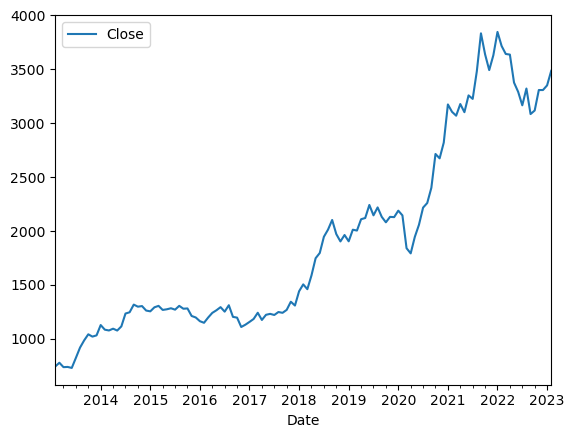

In [15]:
df2.plot()

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df2['Close'])

In [18]:
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df2['Close'])

ADF Test Statistic : -0.058460908809196195
p-value : 0.9534220050297604
#Lags Used : 0
Number of Observations Used : 120
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
### differencing
import warnings
warnings.filterwarnings('ignore')

In [21]:
df1[' First Difference'] = df2['Close'] - df2['Close'].shift(1)

In [22]:
df2['Close'].shift(1)

Date
2013-02-28            NaN
2013-03-31     742.539990
2013-04-30     777.755256
2013-05-31     736.816254
2013-06-30     738.813635
                 ...     
2022-10-31    3085.195435
2022-11-30    3118.149979
2022-12-31    3308.226179
2023-01-31    3308.034102
2023-02-28    3351.288098
Freq: M, Name: Close, Length: 121, dtype: float64

In [23]:
df2['Seasonal First Difference']=df2['Close']-df2['Close'].shift(12)

In [24]:
df2.head(20)

,Close,Seasonal First Difference
Date,,
2013-02-28,742.539990,NaN
2013-03-31,777.755256,NaN
2013-04-30,736.816254,NaN
2013-05-31,738.813635,NaN
2013-06-30,729.618750,NaN
2013-07-31,823.005440,NaN
2013-08-31,918.097498,NaN
2013-09-30,985.087512,NaN
2013-10-31,1041.546422,NaN


In [25]:
## Again test dickey fuller test
adfuller_test(df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.9772589213345129
p-value : 0.296632411461199
#Lags Used : 13
Number of Observations Used : 95
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Auto Regressive Model

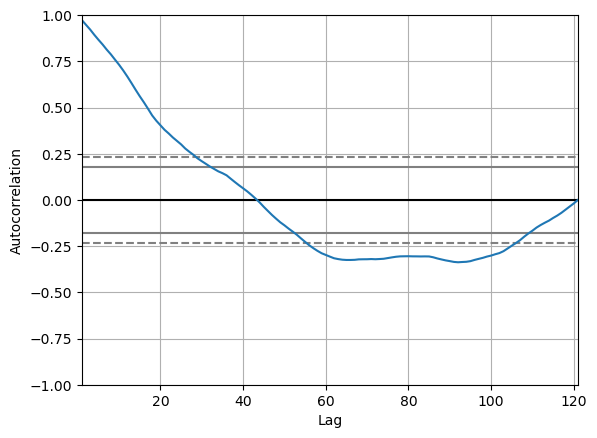

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Close'])
plt.show()

In [27]:
import statsmodels as sm
import statsmodels.graphics.tsaplots as tsa_plots

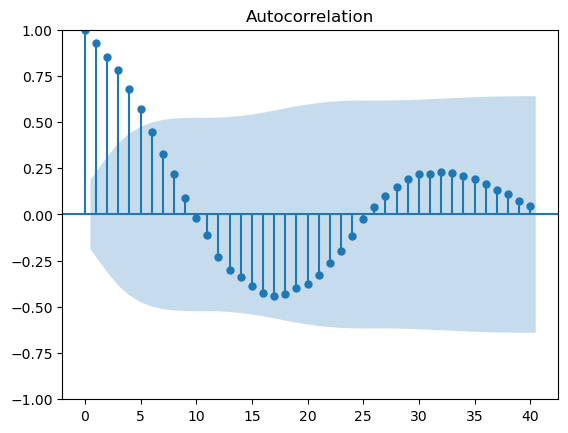

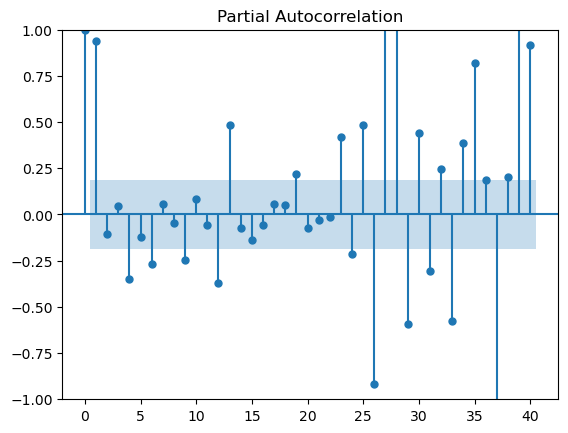

In [28]:
tsa_plots.plot_acf(df2['Seasonal First Difference'].iloc[13:],lags=40)
tsa_plots.plot_pacf(df2['Seasonal First Difference'].iloc[13:],lags=40)
plt.show()

In [29]:
# For non-seasonal data
#p=1, d=1, q=5


In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
model=ARIMA(df1['Close'],order=(1,1,5))
model_fit=model.fit()

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2467
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -12015.338
Date:                Fri, 17 Mar 2023   AIC                          24044.676
Time:                        18:47:30   BIC                          24085.349
Sample:                             0   HQIC                         24059.453
                               - 2467                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0867      0.292     -0.297      0.767      -0.659       0.486
ma.L1          0.0746      0.291      0.257      0.797      -0.495       0.644
ma.L2         -0.0346      0.013     -2.601      0.009      -0.061      -0.009
ma.L3         -0.0235      0.018     -1.333      0.183      -0.058       0.011
ma.L4          0.0119      0.016      0.757      0.449      -0.019       0.043
ma.L5          0.0472      0.015      3.080      0.002       0.017       0.077
sigma2       998.9574     14.498     68.904      0.000     970.542    1027.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3691.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.09   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

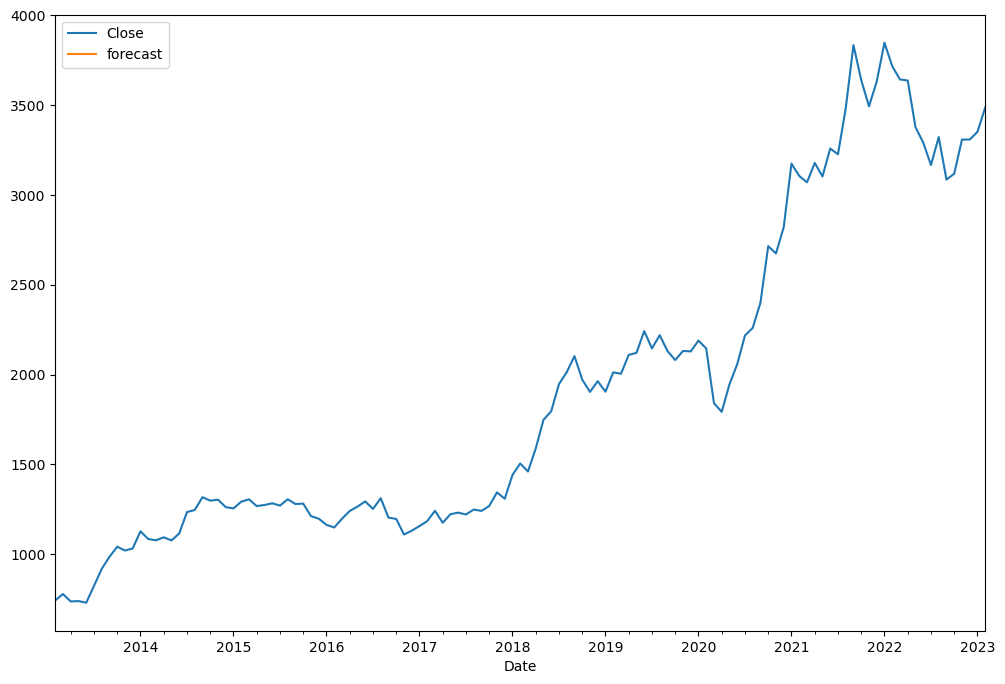

In [33]:
df2['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df2[['Close','forecast']].plot(figsize=(12,8))

In [34]:
import statsmodels.api as sm

In [35]:
model=sm.tsa.statespace.SARIMAX(df2['Close'],order=(1, 1, 5),seasonal_order=(1,1,5,12))
results=model.fit()

<AxesSubplot:>

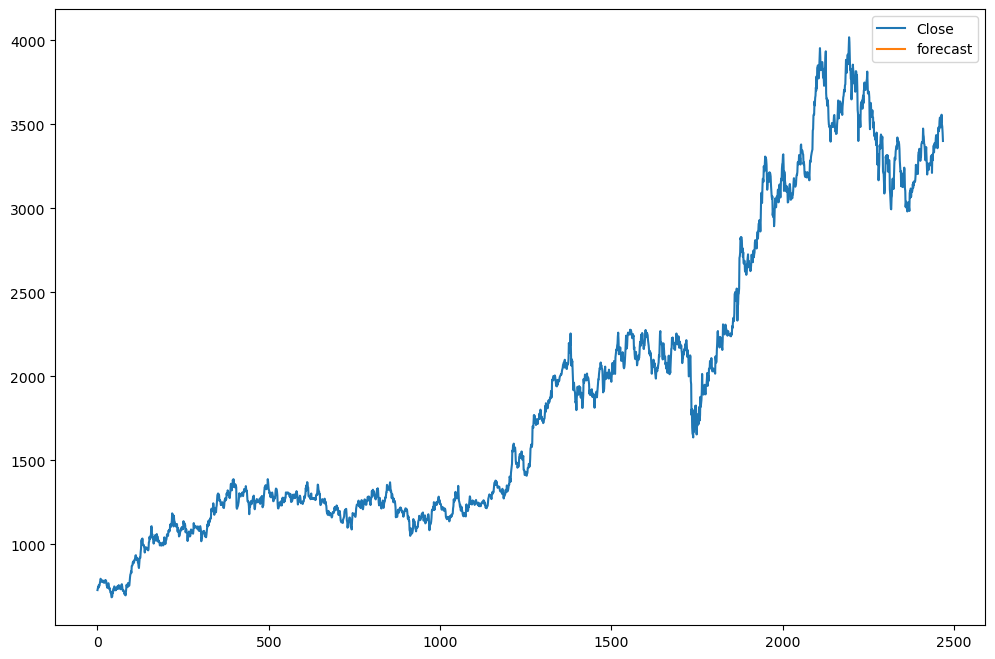

In [36]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['Close','forecast']].plot(figsize=(12,8))

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates=[df2.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [38]:
future_datest_df2=pd.DataFrame(index=future_dates[1:],columns=df2.columns)


In [39]:
future_datest_df2


,Close,Seasonal First Difference,forecast
2023-03-28,NaN,NaN,NaN
2023-04-28,NaN,NaN,NaN
2023-05-28,NaN,NaN,NaN
2023-06-28,NaN,NaN,NaN
2023-07-28,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN
2023-09-28,NaN,NaN,NaN
2023-10-28,NaN,NaN,NaN
2023-11-28,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN


In [40]:
future_df=pd.concat([df2,future_datest_df2])

<AxesSubplot:>

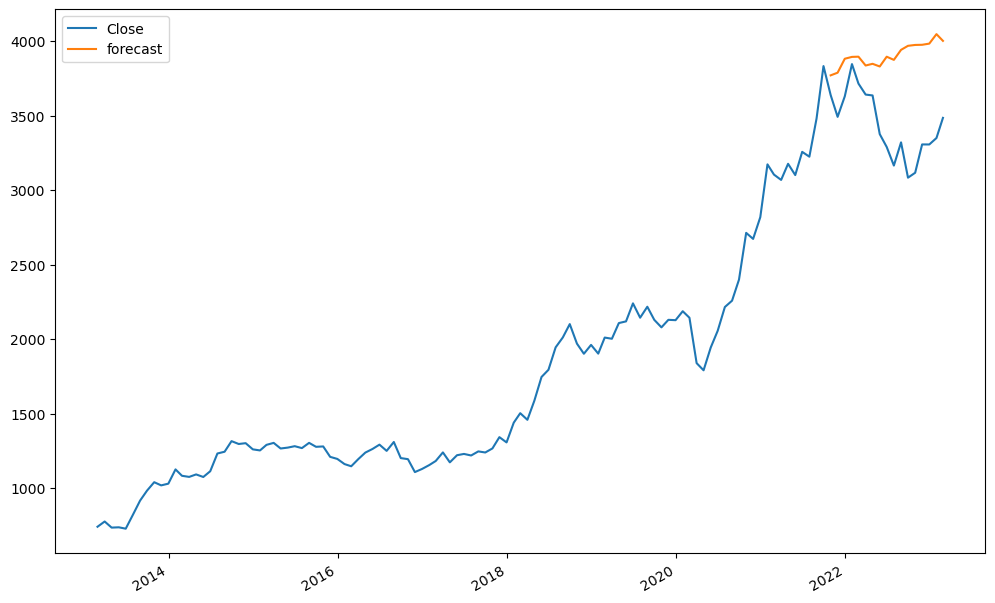

In [41]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Close', 'forecast']].plot(figsize=(12, 8)) 

In [42]:
from statsmodels.tools.eval_measures import rmse

In [49]:
rmse_arima_model=rmse('future_datest_df2',0)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U17'), dtype('int32')) -> None

In [ ]:
rmse_arima_model